In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [63]:
walk_dataset = pd.read_csv('./Sample Datasets/Sample_walk_dataset_2.csv')
walk_dataset
test_walk_dataset = pd.read_csv('./Sample Datasets/Sample_walk_dataset.csv')
test_walk_dataset

,O,Action,X,Y,Z,Acc,TS
0,0,1,0.0,0.0,0.0,0.0,0.0
1,0,1,0.0,0.0,0.0,0.0,0.0
2,0,1,0.0,0.0,-0.1,0.1,0.0
3,0,1,-0.1,0.0,0.1,0.1,0.1
4,0,1,0.0,0.0,0.2,0.2,0.1
...,...,...,...,...,...,...,...
1252,0,1,0.1,0.0,-0.1,0.1,24.1
1253,0,1,0.2,0.0,0.0,0.2,24.1
1254,0,1,0.0,0.0,0.0,0.0,24.1
1255,0,1,-0.1,0.0,-0.1,0.1,24.1


In [57]:
run_dataset = pd.read_csv('./Sample Datasets/Sample_run_dataset_2.csv')
run_dataset = run_dataset[:1784]
run_dataset
test_run_dataset = pd.read_csv('./Sample Datasets/Sample_run_dataset.csv')
test_run_dataset

,O,Action,X,Y,Z,Acc,TS
0,0,0,-0.1,-0.1,-0.8,0.8,0.0
1,0,0,0.0,0.0,-0.6,0.6,0.0
2,0,0,0.0,0.1,0.4,0.4,0.0
3,0,0,0.1,0.1,0.1,0.2,0.1
4,0,0,0.1,0.1,-0.1,0.2,0.1
...,...,...,...,...,...,...,...
753,0,0,0.0,-0.1,0.2,0.2,14.5
754,0,0,-0.1,0.0,0.0,0.1,14.5
755,0,0,0.0,0.0,-0.2,0.2,14.5
756,0,0,0.0,0.0,0.0,0.0,14.6


run or walk? run
What type of plot? Single (S) or Multiple (M) or count spikes (CS): M


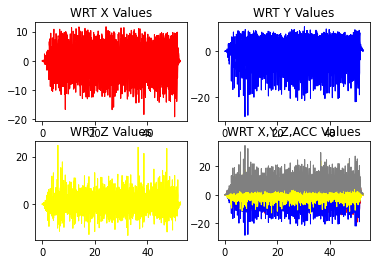

In [20]:
def count_spikes(list,TS):
    
    std_spike_val = 8
    diff_ts_spike = 1.0
    prev_spike_ts = 0.0
    counter = 0
    for idx,val in enumerate(list):
        if val >= std_spike_val and TS[idx] - prev_spike_ts >= diff_ts_spike:
            counter+=1
            prev_spike_ts = TS[idx]
        
    print(f'Number of spikes: {counter}')

def plot_one_plot():
    val = input('Which section? (X,Y,Z,Acc): ')
    if val == 'X':
        plt.plot(TS,X,color="red",linewidth=1.0)
    elif val == 'Y':
        plt.plot(TS,Y,color="red",linewidth=1.0)
    elif val == 'Z':
        plt.plot(TS,Z,color="red",linewidth=1.0)
    else:
        plt.axhline(y=12.5)
        plt.axhline(y=10)
        plt.scatter(TS,Acc,s=10,color="blue")
        plt.plot(TS,Acc,color="red",linewidth=1.0)
    plt.xlabel('Time Stamp')
    plt.ylabel('acceleration in m/s (Gravity Incl)')


def plot_sub_plots():
    figure, axis = plt.subplots(2, 2)

    axis[0,0].plot(TS,X,color="red",linewidth=1.0)
    axis[0,0].set_title("WRT X Values")

    axis[0,1].plot(TS,Y,color="blue",linewidth=1.0)
    axis[0,1].set_title("WRT Y Values")

    axis[1,0].plot(TS,Z,color="yellow",linewidth=1.0)
    axis[1,0].set_title("WRT Z Values")

    axis[1,1].plot(TS,X,color="red",linewidth=1.0)
    axis[1,1].plot(TS,Y,color="blue",linewidth=1.0)
    axis[1,1].plot(TS,Z,color="yellow",linewidth=1.0)
    axis[1,1].plot(TS,Acc,color="grey",linewidth=1.0)
    axis[1,1].set_title("WRT X,Y,Z,ACC Values")

choice = input('run or walk? ')
matrix = pd.read_csv(f'./Sample Datasets/Sample_{choice}_dataset_2.csv')
plot_type = input('What type of plot? Single (S) or Multiple (M) or count spikes (CS): ')
LR = matrix.iloc[:,[0]].values
RW = matrix.iloc[:,[1]].values
X = matrix.iloc[:,[2]].values
Y = matrix.iloc[:,[3]].values
Z = matrix.iloc[:,[4]].values
Acc = matrix.iloc[:,[5]].values
#TS_i = matrix.iloc[:,[4]].values[0]
#TS = (matrix.iloc[:,[4]].values - TS_i)/100000000
TS = matrix.iloc[:,[6]].values
if TS[0] > 100000000:
    TS = convert_ts(TS)
if plot_type == 'S':
    plot_one_plot()
elif plot_type == 'M': 
    plot_sub_plots()
else:
    count_spikes(Acc,TS=TS)
plt.show()



In [58]:
X_walk = walk_dataset.iloc[:,[2,3,4,5]]
y_walk = walk_dataset.iloc[:,[1]]
X_walk

test_X_walk = test_walk_dataset.iloc[:,[2,3,4,5]]
test_y_walk = test_walk_dataset.iloc[:,[1]]
test_X_walk

,X,Y,Z,Acc
0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0
2,0.0,0.0,-0.1,0.1
3,-0.1,0.0,0.1,0.1
4,0.0,0.0,0.2,0.2
...,...,...,...,...
1252,0.1,0.0,-0.1,0.1
1253,0.2,0.0,0.0,0.2
1254,0.0,0.0,0.0,0.0
1255,-0.1,0.0,-0.1,0.1


In [59]:
X_run = run_dataset.iloc[:,[2,3,4,5]]
y_run = run_dataset.iloc[:,[1]]
X_run.head()

test_X_run = test_run_dataset.iloc[:,[2,3,4,5]]
test_y_run = test_run_dataset.iloc[:,[1]]
test_X_run

,X,Y,Z,Acc
0,-0.1,-0.1,-0.8,0.8
1,0.0,0.0,-0.6,0.6
2,0.0,0.1,0.4,0.4
3,0.1,0.1,0.1,0.2
4,0.1,0.1,-0.1,0.2
...,...,...,...,...
753,0.0,-0.1,0.2,0.2
754,-0.1,0.0,0.0,0.1
755,0.0,0.0,-0.2,0.2
756,0.0,0.0,0.0,0.0


In [60]:
X_frames = [X_walk,X_run]
X = pd.concat(X_frames)
X

test_X_frames = [test_X_walk,test_X_run]
test_X = pd.concat(test_X_frames)
test_X

,X,Y,Z,Acc
0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0
2,0.0,0.0,-0.1,0.1
3,-0.1,0.0,0.1,0.1
4,0.0,0.0,0.2,0.2
...,...,...,...,...
753,0.0,-0.1,0.2,0.2
754,-0.1,0.0,0.0,0.1
755,0.0,0.0,-0.2,0.2
756,0.0,0.0,0.0,0.0


In [65]:
Y_frames = [y_walk,y_run]
y = pd.concat(Y_frames)
y
test_Y_frames = [test_y_walk,test_y_run]
test_y = pd.concat(test_Y_frames)
test_y

,Action
0,1
1,1
2,1
3,1
4,1
...,...
753,0
754,0
755,0
756,0


In [48]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [50]:
model = Sequential([
    Dense(units=16, input_shape=(4,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax')
])

In [51]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                80        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 690
Trainable params: 690
Non-trainable params: 0
_________________________________________________________________


In [53]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [55]:
model.fit(x=X,y=y, batch_size=10, validation_split=0.1,epochs=30, shuffle=False,verbose=2)

Epoch 1/30
177/177 - 0s - loss: 0.1688 - accuracy: 0.8839 - val_loss: 0.0327 - val_accuracy: 1.0000
Epoch 2/30
177/177 - 0s - loss: 0.1671 - accuracy: 0.8839 - val_loss: 0.0333 - val_accuracy: 1.0000
Epoch 3/30
177/177 - 0s - loss: 0.1658 - accuracy: 0.8839 - val_loss: 0.0336 - val_accuracy: 1.0000
Epoch 4/30
177/177 - 0s - loss: 0.1648 - accuracy: 0.8833 - val_loss: 0.0337 - val_accuracy: 1.0000
Epoch 5/30
177/177 - 0s - loss: 0.1638 - accuracy: 0.8833 - val_loss: 0.0338 - val_accuracy: 1.0000
Epoch 6/30
177/177 - 0s - loss: 0.1630 - accuracy: 0.8827 - val_loss: 0.0338 - val_accuracy: 1.0000
Epoch 7/30
177/177 - 0s - loss: 0.1621 - accuracy: 0.8827 - val_loss: 0.0338 - val_accuracy: 1.0000
Epoch 8/30
177/177 - 0s - loss: 0.1613 - accuracy: 0.8827 - val_loss: 0.0338 - val_accuracy: 1.0000
Epoch 9/30
177/177 - 0s - loss: 0.1605 - accuracy: 0.8833 - val_loss: 0.0338 - val_accuracy: 1.0000
Epoch 10/30
177/177 - 0s - loss: 0.1597 - accuracy: 0.8833 - val_loss: 0.0339 - val_accuracy: 1.0000

In [66]:
model_predictions = model.predict(x=test_X, batch_size=10, verbose=0)

In [67]:
for val in model_predictions:
    print(val)

[0.43795288 0.5620471 ]
[0.43795288 0.5620471 ]
[0.42880267 0.5711973 ]
[0.458747   0.54125303]
[0.4493709 0.5506291]
[0.4704708 0.5295292]
[0.44591418 0.55408585]
[0.43116164 0.56883836]
[0.44204637 0.55795366]
[0.44204637 0.55795366]
[0.43611377 0.5638862 ]
[0.42442346 0.57557654]
[0.42442346 0.57557654]
[0.4291567 0.5708433]
[0.44188058 0.5581194 ]
[0.43278825 0.56721175]
[0.43778184 0.5622181 ]
[0.45937008 0.54062986]
[0.45937008 0.54062986]
[0.43330932 0.5666907 ]
[0.4264399  0.57356006]
[0.43330932 0.5666907 ]
[0.44546726 0.5545327 ]
[0.44204637 0.55795366]
[0.4626002 0.5373998]
[0.5109835 0.4890165]
[0.5426906  0.45730937]
[0.435784   0.56421596]
[0.44992003 0.55008   ]
[0.43492958 0.56507045]
[0.43385753 0.5661425 ]
[0.44204637 0.55795366]
[0.44077092 0.5592291 ]
[0.48102626 0.51897377]
[0.5357191  0.46428087]
[0.42305958 0.5769404 ]
[0.68819815 0.3118019 ]
[0.6717312  0.32826883]
[0.5345265  0.46547347]
[0.41161644 0.58838356]
[0.5797811  0.42021886]
[0.52526015 0.47473994]
[0

[0.99649906 0.00350097]
[9.9994361e-01 5.6407225e-05]
[9.999987e-01 1.348128e-06]
[9.9973375e-01 2.6627164e-04]
[0.6799981 0.3200019]
[0.99725264 0.00274731]
[9.999211e-01 7.889037e-05]
[9.9999738e-01 2.6577222e-06]
[0.9981152  0.00188479]
[0.9681742  0.03182575]
[0.9678572  0.03214286]
[0.89236677 0.10763326]
[0.99672014 0.00327982]
[0.40677533 0.5932247 ]
[0.9442406  0.05575942]
[0.9328115  0.06718845]
[0.53682274 0.46317732]
[0.57259476 0.4274052 ]
[0.55479616 0.44520384]
[0.4533965  0.54660356]
[0.78303957 0.21696043]
[0.85245126 0.1475487 ]
[0.45986256 0.54013747]
[0.7749359  0.22506413]
[0.72367656 0.27632347]
[0.7373168  0.26268318]
[0.626422 0.373578]
[0.44651777 0.55348223]
[0.7013668  0.29863325]
[0.6581019 0.3418981]
[0.5200566 0.4799434]
[0.9216366  0.07836338]
[0.88625115 0.11374883]
[0.7485836  0.25141636]
[0.893532   0.10646799]
[0.63619936 0.36380067]
[0.42500272 0.57499725]
[0.55482143 0.44517857]
[0.9279998  0.07200013]
[9.993123e-01 6.877404e-04]
[9.9969208e-01 3.079

[1.00000e+00 3.59918e-12]
[9.9968135e-01 3.1864323e-04]
[9.9922860e-01 7.7143445e-04]
[0.98858005 0.01141995]
[0.95957065 0.04042938]
[0.9334491  0.06655094]
[9.9905235e-01 9.4769534e-04]
[9.996302e-01 3.698196e-04]
[9.9997497e-01 2.5086088e-05]
[0.9894862  0.01051379]
[0.9904822  0.00951779]
[0.9960257  0.00397429]
[1.00000e+00 8.27446e-09]
[0.98445386 0.01554621]
[0.9977718  0.00222818]
[0.9601156  0.03988442]
[0.99290305 0.00709691]
[9.993370e-01 6.629159e-04]
[9.991893e-01 8.106762e-04]
[0.9970488  0.00295122]
[0.9893295  0.01067049]
[0.98546416 0.01453582]
[0.9532495  0.04675052]
[0.8914134  0.10858664]
[0.97725505 0.02274492]
[0.96069556 0.03930441]
[9.9991107e-01 8.8945970e-05]
[9.9963629e-01 3.6366493e-04]
[9.995215e-01 4.784744e-04]
[9.999963e-01 3.720851e-06]
[0.9947001  0.00529998]
[9.9996901e-01 3.0979598e-05]
[0.8566932  0.14330679]
[9.9981564e-01 1.8435129e-04]
[1.0000000e+00 2.2855888e-08]
[9.9999893e-01 1.0672102e-06]
[0.9975745 0.0024255]
[9.999467e-01 5.328295e-05]
[0

In [68]:
round_pred = np.argmax(model_predictions, axis=-1)

In [69]:
for val in round_pred:
    print(val)

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
1
1
1
1
1
1
1
0
1
0
0
0
1
0
0
1
1
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
1
1
1
1
0
0
0
0
1
1
0
0
0
0
0
0
0
0
0
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
0
0
1
1
0
1
1
0
1
1
0
0
0
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
1
0
0
0
0
0
1
1
0
0
0
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
1
0
0
0
0
0
0
0
0
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
1
0
0
0
0
0
1
0
0
0
0
0
0
0
0
1
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
1
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
1
0
0
0
0
1
1
0
1
1
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
1
1
0
1
0
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1


In [77]:
import os.path
if os.path.isfile('trained_models/run_walk_model.h5') is False:
    model.save('trained_models/run_walk_model.h5')

In [78]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
with open('trained_models/run_walk_model.tflite', 'wb') as f:
  f.write(tflite_model)

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: C:\Users\Mihir\AppData\Local\Temp\tmpxszl0sug\assets


In [86]:
interpreter = tf.lite.Interpreter(model_path="trained_models/run_walk_model.tflite")
interpreter.allocate_tensors()

# Print input shape and type
inputs = interpreter.get_input_details()
print('{} input(s):'.format(len(inputs)))
for i in range(0, len(inputs)):
    print('{} {}'.format(inputs[i]['shape'], inputs[i]['dtype']))

# Print output shape and type
outputs = interpreter.get_output_details()
print('\n{} output(s):'.format(len(outputs)))
for i in range(0, len(outputs)):
    print('{} {}'.format(outputs[i]['shape'], outputs[i]['dtype']))

1 input(s):
[1 4] <class 'numpy.float32'>

1 output(s):
[1 2] <class 'numpy.float32'>


In [99]:
print(model.predict([[-0.5,-0.6,0.5,0.9],
[0.5,-1.3,-0.1,0.4],
[0,-0.2,-1.3,0.3],
[-0.3,-0.2,-0.6,0.7],
[0.1,-1.3,1.2,0.8]]))


print(model.predict([[0.4,1.4,-6.9,7.1],
[-0.9,1.2,-2.2,2.7],
[-2.1,1.8,1.9,3.4],
[-1.8,3,2.2,4.1],
[1.5,3.7,2.2,4.6]]))

[[0.48653975 0.5134602 ]
 [0.67118573 0.3288143 ]
 [0.441285   0.558715  ]
 [0.45870417 0.5412958 ]
 [0.61587244 0.38412756]]
[[0.99733907 0.00266093]
 [0.8587754  0.14122465]
 [0.9970983  0.00290166]
 [0.99826425 0.00173583]
 [0.86640733 0.13359267]]
